## Introduction
This notebook is a representation of the SVM (Support Vector Machine) model, which is a machine learning technique used to test the accuracy and prediction on a given set of data by finding a hyperplane that divides the data points into different classes. More often than not SVM is used for classification problems but can also be used for regression problems. In python we use the __sklearn.svm__ library and import the function __SVC__ for creating an SVM model. This is one of the 4 different types of models our group has used to predict on the loan dataset which we have obtained from [kaggle](https://www.kaggle.com/datasets/wordsforthewise/lending-club).   
A CSV format of the loan data set which could be found in the same folder as this notebook, named as __my_full_data.csv__, has, as always, been imported on to the notebook using the __read_csv__ function from the __pandas__ library. This CSV file has been preporcessed by Imran from our group and we have all used the same to perform our analysis. We also tune the hyperparameters of the SVC function by using the __GridSearhcCV__ function from the __sklearn.model_selection__ library. Further, some dimensionality reduction techniques such as PCA (Prinicipal Component Analysis) and LDA (Linear Discriminant Analysis) are used to compare the accuracy of each of the SVM models and this is primarily done by using the ROC (Receiver-Operator Curve) which is plotted throughout the notebook for the transformed moedls to provide any valulable infomration through visualisation. Finally, an ROC curve for all the models are plotted together to observe any visible difference and if any defnite conslusion can be drawn about which type of SVM model is preferred and why.

In [1]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold

# Displaying CSV file and pre-processing if required:  
By using the __read_csv__ function I have used the variable data which will consist of all the __data__ of the csv file in table format. The steps following this are just to ensure if there is any data which is of object or string type, it is changed to integer type to prevent any sort misfitting or discrepansies while fitting the model.

In [2]:
data=pd.read_csv('my_full_data.csv')

In [3]:
data=data.drop('id',axis=1)

In [4]:
data['application_type']=data['application_type'].replace({'Individual':0, 'Joint App':1})

In [5]:
data['initial_list_status']=data['initial_list_status'].replace({'w':0,'f':1})
data

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,addr_state,dti,open_acc,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,application_type,tax_liens
0,0,2500.0,0,17.27,89.47,3,1,1,50000.0,2,...,9,9,17.60,7.0,22.0,1,669.0,665.0,0,0.0
1,1,7200.0,0,17.27,257.67,3,9,4,20000.0,2,...,2,18,13.21,8.0,17.0,1,549.0,545.0,0,0.0
2,2,16000.0,0,10.78,522.16,1,5,5,63000.0,0,...,2,33,35.19,12.0,22.0,1,594.0,590.0,0,0.0
3,3,16000.0,0,5.32,481.84,0,8,1,96000.0,0,...,2,22,14.45,23.0,38.0,1,744.0,740.0,0,0.0
4,4,13000.0,1,16.59,320.23,3,10,5,40000.0,2,...,2,11,16.74,6.0,17.0,1,569.0,565.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26113,26113,12000.0,0,13.99,410.08,2,0,5,47000.0,1,...,1,25,31.79,13.0,28.0,0,754.0,750.0,0,0.0
26114,26114,25000.0,1,25.69,743.94,5,6,1,70000.0,2,...,9,5,15.10,9.0,19.0,0,499.0,0.0,0,0.0
26115,26115,16000.0,0,12.79,537.49,2,1,4,48000.0,0,...,2,4,33.60,11.0,17.0,0,699.0,695.0,0,0.0
26116,26116,35000.0,1,15.59,843.53,2,1,1,180000.0,2,...,2,9,13.09,17.0,31.0,0,714.0,710.0,0,0.0


In [6]:
data['addr_state'].unique()

array([ 9, 18, 33, 22, 11, 34, 42, 23, 24, 14, 28,  4,  6, 44,  1, 19, 39,
       10, 21, 13,  2, 26, 41, 29,  5, 46, 48, 37,  8, 38, 47, 36, 30, 17,
       43, 32,  3, 25, 15,  7, 16, 31, 35, 27, 20, 45, 49,  0, 40, 12],
      dtype=int64)

In [7]:
data['purpose'].unique()

array([ 9,  2,  4,  1,  7,  0,  6, 12,  8, 11,  5, 10, 13,  3],
      dtype=int64)

In [8]:
data['verification_status']=data['verification_status'].replace({'Not Verified':0, 'Source Verified':1, 'Verified':2})

In [9]:
data['home_ownership']=data['home_ownership'].replace({'MORTGAGE':0, 'RENT':1, 'OWN':2, 'ANY':3, 'NONE':4, 'OTHER':4})

In [10]:
data['emp_length']=data['emp_length'].replace({'10+ years':10, '3 years':3, '6 years':6, '1 year':1, '7 years':7, '8 years':8,
       '5 years':5, '2 years':2, '9 years':9, '< 1 year':0, '4 years':4})

In [11]:
data['term']=data['term'].replace({' 36 months':0, ' 60 months':1})

In [12]:
for column in data.columns:
    if data[column].dtype=='bool':
        data[column]=data[column].astype(int)

In [13]:
[column for column in data.columns if data[column].dtype=='object']

[]

# Creating a test-train split and standardizing the features:
Here we create a test-train split while considering the __'loan_status'__ as the dependent variable and the features that may be dependent on it.

In [14]:
from sklearn.model_selection import train_test_split
y=data['loan_status']
x=data.drop('loan_status',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=123,shuffle=True)

In [15]:
x_train.shape

(20894, 20)

In [16]:
x_test.shape

(5224, 20)

In [17]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Creating the SVM model using SVC() and predicting on the test data:
We create an SVM model using the radial kernel at first as this was what we talked about in the group discussion based on the premise that while looking at the [Workshop 5.3](https://dsbristol.github.io/dst/assets/workshops/block05-Classification.html), the radial kernel model had an overall better performance as compared to the linear one. 

In [18]:
svm_rbf = SVC(kernel='rbf',probability=True,random_state=42,C=1,class_weight='balanced')

In [19]:
svm_rbf = svm_rbf.fit(x_train,y_train)

In [20]:
y_pred = svm_rbf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

# Cross-Validation scores (accuracy):

In [21]:
cv = StratifiedKFold(n_splits=5)
scores1 = cross_val_score(svm_rbf, x_train, y_train , cv=cv, scoring='accuracy')
scores1

array([0.87413257, 0.86264657, 0.88059344, 0.87915769, 0.87984682])

We see that all 5 folds of cross-validation proved to have high accuracy scores, which means that the model is consistent and also likely to generalise well on unseen data.

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 87.58%
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.86      0.74      1099
           1       0.96      0.88      0.92      4125

    accuracy                           0.88      5224
   macro avg       0.81      0.87      0.83      5224
weighted avg       0.90      0.88      0.88      5224



# Using predict_proba() and plotting ROC curve for the baseline SVM model
The below function __predict_proba()__ is used to provide probability scores which is detrimental to plot ROC curves. 

In [23]:
y_pred1 = svm_rbf.predict_proba(x_test)[:, 1]
y_pred1

array([0.99999361, 0.9669873 , 0.98296591, ..., 0.88372751, 0.91312476,
       0.30316569])

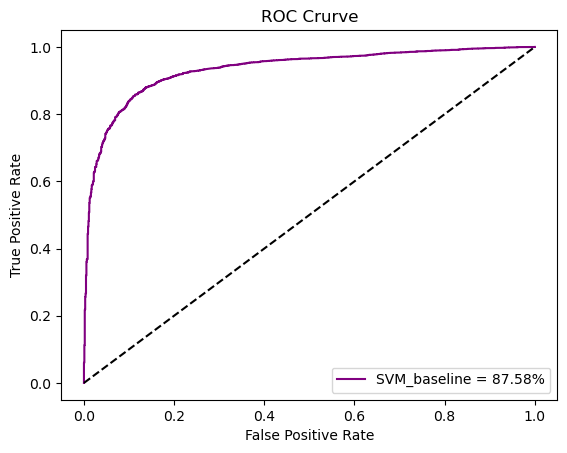

In [24]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred1)
plt.plot(fpr, tpr, color='purple', label='SVM_baseline = 87.58%')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Crurve')
plt.legend()
plt.show()

# Grid search analysis to find the best parameters for the SVM model:
We now move on to the part where we perform GridSearchCV by defining a paramter grid which would consist of all the parameters we would want the grid to search to provide the optimal values for each. Here we have taken C, gamma and kernel into consideration. The next step would be to create a pipeline which is basically asking the grid search to perform multiple tasks at once. From there, we run the grid search analysis using cross validation with 5 folds, fit the model and perform a search to find the best pararmters and the best cross-validation accuracy.   
We first use the scoring for the grid search as __accuracy__ and then use __roc_auc__ to see of there is any siginificant difference between the two.

In [25]:
param_grid = {
    'svc__C': [0.1,1,5,10,15,20,25,40,35,40,45,50,55,60,65,70,75,80,85,90,95,100],        
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf']     
}

pipeline = make_pipeline(StandardScaler(), SVC(probability=True))

In [26]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy',n_jobs=-1)

In [51]:
grid_search = grid_search.fit(x_train, y_train)

In [52]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'svc__C': 5, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best cross-validation accuracy: 0.90


In [53]:
svm_rbf_best_param = SVC(kernel='rbf',gamma=0.01,C=5,probability=True)
svm_rbf_best_param = svm_rbf_best_param.fit(x_train,y_train)

The SVM model is once again trained only this time after using the best parameters which was provided by the grid search.

In [54]:
y_pred2 = svm_rbf_best_param.predict(x_test)
y_pred2

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [91]:
scores2 = cross_val_score(svm_rbf_best_param, x_train, y_train , cv=cv, scoring='accuracy')
scores2

array([0.89662599, 0.8817899 , 0.90093324, 0.8992582 , 0.90186692])

Here we find that the cross-validation accuracy scores are slightly better than baseline model with the best being ~90%.

In [55]:
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 89.57%
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74      1099
           1       0.92      0.95      0.93      4125

    accuracy                           0.90      5224
   macro avg       0.85      0.82      0.84      5224
weighted avg       0.89      0.90      0.89      5224



In [56]:
y_pred3 = svm_rbf_best_param.predict_proba(x_test)[:, 1]
y_pred3

array([0.98797945, 0.94223435, 0.96060661, ..., 0.91475615, 0.91566241,
       0.0435219 ])

We plot the ROC curve again

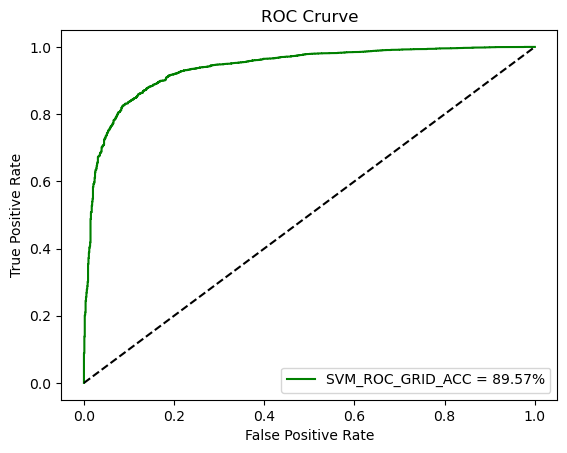

In [111]:
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred3)
plt.plot(fpr1, tpr1, color='green', label='SVM_ROC_GRID_ACC = 89.57%')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Crurve')
plt.legend()
plt.show()

Plotting both the baseline and Grid search ROC curves shows us that apart from the difference in accuracy there is no clear winner here.

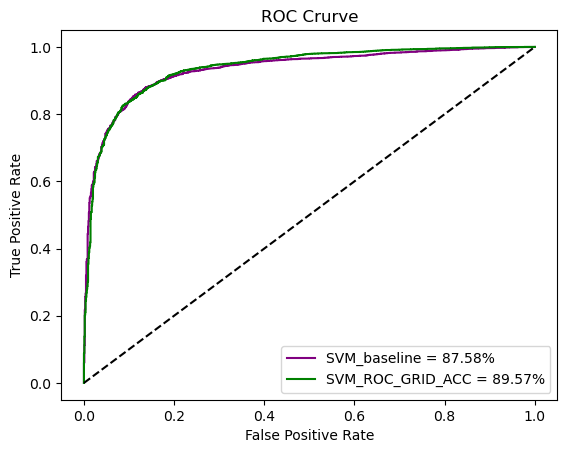

In [112]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred1)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred3)
plt.plot(fpr, tpr, color='purple', label='SVM_baseline = 87.58%')
plt.plot(fpr1, tpr1, color='green', label='SVM_ROC_GRID_ACC = 89.57%')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Crurve')
plt.legend()
plt.show()

In [61]:
grid_search1 = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc',n_jobs=-1)

In [62]:
grid_search1 = grid_search1.fit(x_train, y_train)

In [63]:
print("Best parameters: ", grid_search1.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search1.best_score_))

Best parameters:  {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best cross-validation accuracy: 0.94


In [64]:
y_pred4 = grid_search1.predict(x_test)
y_pred4

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [65]:
accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred4))

Accuracy: 89.61%
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74      1099
           1       0.92      0.95      0.93      4125

    accuracy                           0.90      5224
   macro avg       0.85      0.83      0.84      5224
weighted avg       0.89      0.90      0.89      5224



In [66]:
y_pred5 = grid_search1.predict_proba(x_test)[:, 1]
y_pred5

array([0.99362779, 0.96171025, 0.96409345, ..., 0.90114829, 0.93839835,
       0.0334534 ])

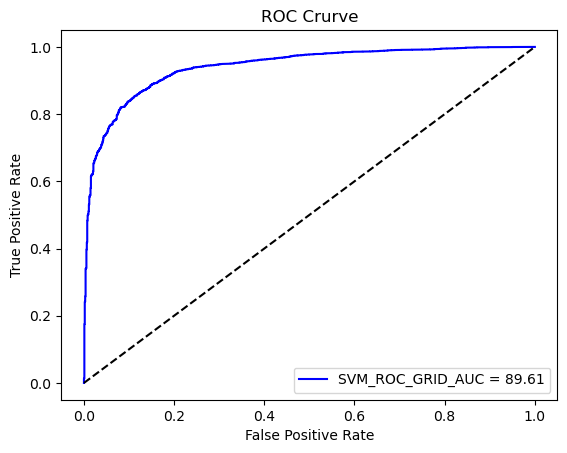

In [113]:
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred5)
plt.plot(fpr2, tpr2, color='blue', label='SVM_ROC_GRID_AUC = 89.61')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Crurve')
plt.legend()
plt.show()

The above results shows us that although not much, there is a slight increase in the accuracy of the SVM model when using grid search analysis with scoring as roc_auc as compared to accuracy, by 0.04%. We can also see that the best cross-valdation accuracy score for scoring = accuracy is 90% with an average accuracy of 89.57% and for scoring = roc_auc is 94% with an average accuracy of 89.61% which may indicate that in terms of consistent modeling, the grid search with accuracy scoring is more reliable.  

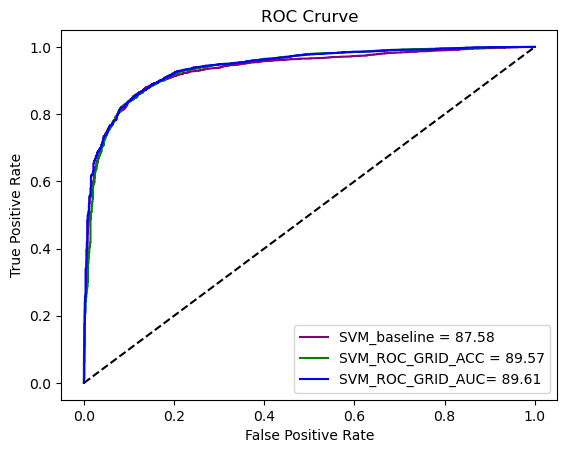

In [114]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred1)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred3)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred5)
plt.plot(fpr, tpr, color='purple', label='SVM_baseline = 87.58')
plt.plot(fpr1, tpr1, color='green', label='SVM_ROC_GRID_ACC = 89.57')
plt.plot(fpr2, tpr2, color='blue', label='SVM_ROC_GRID_AUC= 89.61')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Crurve')
plt.legend()
plt.show()

# Dimensionality reduction with PCA and LDA:  
This section will consider reducing the number of parameters to see if there is any change in performance of the SVM model based on the best parameters obtained from the grid search analysis with scoring = accuracy. For both PCA and LDA, the optimal number of paramters are found, then the training and testing data are transformed using PCA and LDA respectively, the model on the training data is predcited, the cross-validation accuracy scores are found and the ROC curves are plotted.

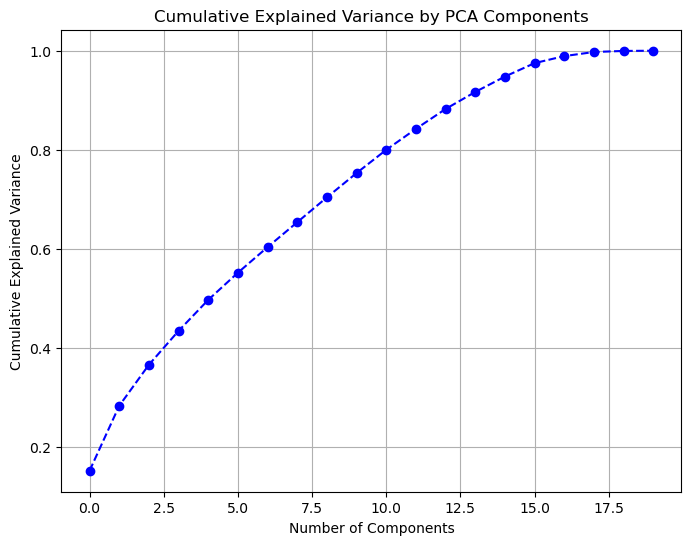

Number of components explaining 95% variance: 16


In [27]:
pca = PCA()
pca.fit(x_train)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
n_components_pca = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components explaining 95% variance: {n_components_pca}')

In [28]:
pca = PCA(n_components = 16)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [29]:
svm_pca = SVC(kernel='rbf' , C = 5, gamma = 0.01, probability = True)
svm_pca = svm_pca.fit(x_train_pca, y_train)

In [30]:
y_pred_pca = svm_pca.predict(x_test_pca)
y_pred_pca

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [31]:
scores2 = cross_val_score(svm_pca, x_train_pca, y_train , cv=cv, scoring='accuracy')
scores2

array([0.89782245, 0.88250778, 0.9018904 , 0.89710457, 0.90067018])

In [32]:
accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_pca))

Accuracy: 89.68%
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1099
           1       0.93      0.94      0.94      4125

    accuracy                           0.90      5224
   macro avg       0.85      0.83      0.84      5224
weighted avg       0.89      0.90      0.90      5224



In [33]:
y_pred_pca1 = svm_pca.predict_proba(x_test_pca)[:,1]
y_pred_pca1

array([0.99499397, 0.95212683, 0.9684826 , ..., 0.90440826, 0.92601341,
       0.00733769])

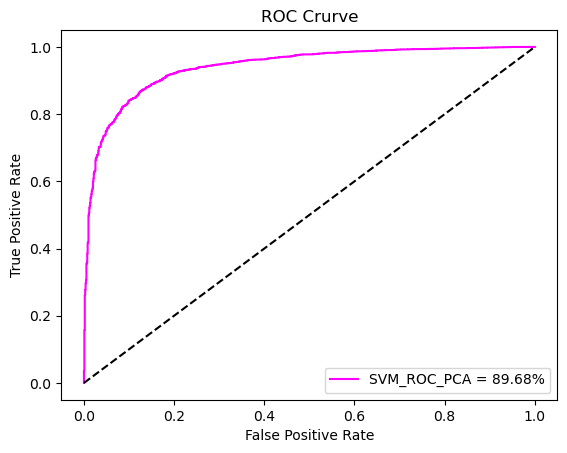

In [34]:
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_pca1)
plt.plot(fpr3, tpr3, color='magenta', label='SVM_ROC_PCA = 89.68%')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Crurve')
plt.legend()
plt.show()

In [126]:
n_classes = len(np.unique(y))
n_features = x.shape[1]
n_components_lda = min(n_classes - 1, n_features)
print(f'Maximum number of components for LDA: {n_components_lda}')

Maximum number of components for LDA: 1


In [77]:
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

In [127]:
svm_lda = SVC(kernel='rbf' , C = 5, gamma = 0.01, probability = True)
svm_lda = svm_pca.fit(x_train_lda, y_train)

In [128]:
y_pred_lda = svm_lda.predict(x_test_lda)
y_pred_lda

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [129]:
scores3 = cross_val_score(svm_lda, x_train_lda, y_train , cv=cv, scoring='accuracy')
scores3

array([0.89495095, 0.87915769, 0.89782245, 0.8935152 , 0.90019148])

In [130]:
accuracy = accuracy_score(y_test, y_pred_lda)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

Accuracy: 89.28%
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.73      1099
           1       0.92      0.95      0.93      4125

    accuracy                           0.89      5224
   macro avg       0.85      0.82      0.83      5224
weighted avg       0.89      0.89      0.89      5224



In [131]:
y_pred_lda1 = svm_lda.predict_proba(x_test_lda)[:,1]
y_pred_lda1

array([0.96949834, 0.95322095, 0.95954061, ..., 0.88798912, 0.94542618,
       0.00237162])

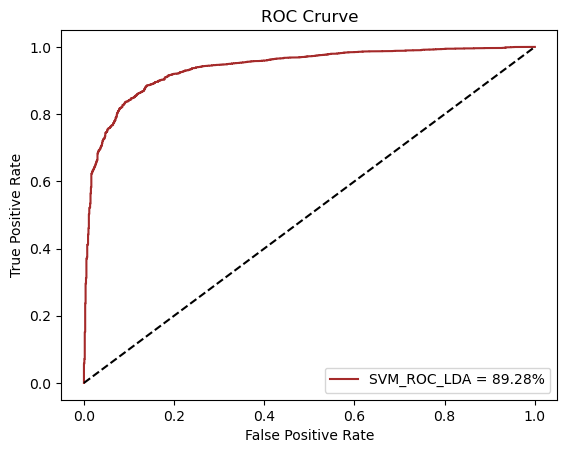

In [133]:
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_lda1)
plt.plot(fpr4, tpr4, color='brown', label='SVM_ROC_LDA = 89.28%')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Crurve')
plt.legend()
plt.show()

It is seen that overall PCA dimensionality reduction helps in improving the SVM model and infact does so by giving the best accuracy out of all the models at 89.68% while LDA gives only around 89.28%, doing even worse than the grid search analysis of the SVM model. Here both the cross-validation accuracy scores of the PCA and LDA models are quite close in terms of precision and the average accuracy of both the models are hence justified and fair. Again, the scores are quite high indicating that the model even with the change in parameter will still do well in predicting unforeseen data.

# PLotting all the models SVM_baseline, SVM_ROC_GRID_ACC,   SVM_ROC_GRID_AUC, SVM_ROC_PCA, SVM_ROC_LDA together:

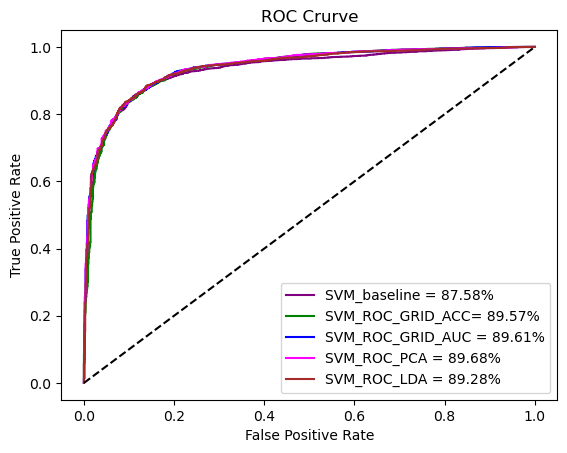

In [134]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred1)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred3)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred5)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_pca1)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_lda1)
plt.plot(fpr, tpr, color='purple', label='SVM_baseline = 87.58%')
plt.plot(fpr1, tpr1, color='green', label='SVM_ROC_GRID_ACC= 89.57%')
plt.plot(fpr2, tpr2, color='blue', label='SVM_ROC_GRID_AUC = 89.61%')
plt.plot(fpr3, tpr3, color='magenta', label='SVM_ROC_PCA = 89.68%')
plt.plot(fpr4, tpr4, color='brown', label='SVM_ROC_LDA = 89.28%')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Crurve')
plt.legend()
plt.show()

# Conclusion:  
After analysing all the different ways of trying to improve baseline SVM model, the model produced with dimensionality reduction using Principal Component Anlysis does best in terms of cross-validation accuracies and overall performance of the model. The scores tell us that it works well on multiple subsets of the data with its precise cross-validation scores accross 5 folds, and also tells us that since these scores are closer to 1, any unseen data can also be generalised considerably well. The joint ROC curves of all the models doesn't really tell us anything in particular except for the fact that all the models are quite close together in terms of accuracy but minor changes can bring about better performance which in the perspective of real-world applications could prove to be quite beneficial.   
Also it is important to note that the number of parameters to begin with were not a large number, so PCA and LDA techniques wouldn't really bring about any ground-breaking changes. In that case, these techniques would be far more suitable for the other notebook in this folder, which is the SVM_MODEL (with my own pre-processing).   




            


Note: The SVM_MODEL (with my own pre-processing) notebook is not completed due to many computational complexities. The details of this is mentioned clearly there.

# Stacking   
 Creating a .joblib file to prevent re-rerunning the model multiple times when stacking using the joblib library

In [35]:
import joblib

In [42]:
joblib.dump(svm_pca,'svm_pca.joblib')

['svm_pca.joblib']

Katherine performed the stacking of all our final models saved in the file named [making a stacked model](https://github.com/christianndjanda/DST_Assessment_1_Group_4/blob/main/KatherineW/Making%20a%20stacked%20model.ipynb) which you can find in her folder from our [github](https://github.com/christianndjanda/DST_Assessment_1_Group_4/tree/main) repository.